# Apply logistic regression to categorize whether a county had high mortality rate due to contamination

## 1. Import the necessary packages to read in the data, plot, and create a logistic regression model

In [17]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

## 2. Read in the hanford.csv file in the `data/` folder 

In [18]:
df = pd.read_csv('hanford.csv')

<img src="../../images/hanford_variables.png"></img>

## 3. Calculate the basic descriptive statistics on the data

In [19]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [20]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


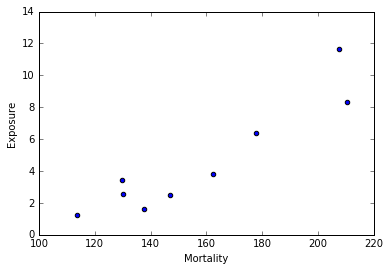

In [21]:
df.plot(kind='scatter', x='Mortality', y='Exposure')

In [22]:
lm = smf.ols(formula="Exposure~Mortality",data=df).fit()

In [23]:
lm.params

Intercept   -10.008255
Mortality     0.092956
dtype: float64

In [24]:
intercept, exposure = lm.params

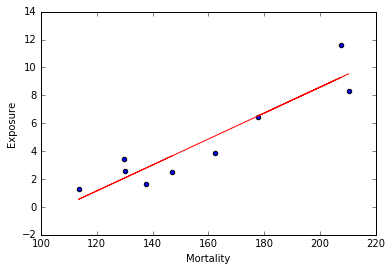

In [25]:
df.plot(kind='scatter', x='Mortality', y='Exposure')
plt.plot(df["Mortality"],exposure*df["Mortality"]+intercept,"-",color="red")

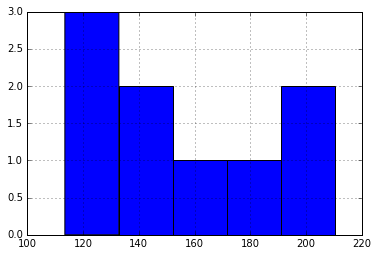

In [26]:
df['Mortality'].hist(bins=5)

## 4. Find a reasonable threshold to say exposure is high and recode the data 

In [27]:
df['Mort_high'] = df['Mortality'].apply(lambda x:1 if x>=147.1 else 0)
df['Expo_high'] = df['Exposure'].apply(lambda x:1 if x>=2 else 0)

In [28]:
df

,County,Exposure,Mortality,Mort_high,Expo_high
0,Umatilla,2.49,147.1,1,1
1,Morrow,2.57,130.1,0,1
2,Gilliam,3.41,129.9,0,1
3,Sherman,1.25,113.5,0,0
4,Wasco,1.62,137.5,0,0
5,HoodRiver,3.83,162.3,1,1
6,Portland,11.64,207.5,1,1
7,Columbia,6.41,177.9,1,1
8,Clatsop,8.34,210.3,1,1


## 5. Create a logistic regression model

In [33]:
lm = LogisticRegression()

In [39]:
x = np.asarray(df[['Exposure']])
y = np.asarray(df['Mort_high'])

In [40]:
lm = lm.fit(x,y)

## 6. Predict whether the mortality rate (Cancer per 100,000 man years) will be high at an exposure level of 50

In [41]:
lm.predict(50)

array([1])